# Find the best location for a new well for OilyGiant mining company
Background:
- Build a model to pick region with the highest profit margin. 

Goal:
- Analyze potential profit and risks of oil well region using boostrapping 

Stages:
- Collect the oil well parameters in the selected region: oil quality and volume of reserves;

- Build a model for predicting the volume of reserves in the new wells;

- Pick the oil wells with the highest estimated values;

- Pick the region with the highest total profit for the selected oil wells.


<div class="alert alert-block alert-warning">
<b></b> <a class="tocSkip"></a>   
    
> # Contents <a id='back'></a>
> * [Introduction](#intro)
    * [Stage 1. Importing libraries](#Import-Libraries)
    * [Stage 2. Data Processing](#Data-Processing)
    * [Stage 3. Train and test the model for each region](#Train-and-test-the-model-for-each-region)
    * [Stage 4. Calculating profit ](#Calculating-profit )
    * [Stage 5. Confidence interval for different regions](#Confidence-interval-for-different-regions)
> * [Conclusion](#Conclusion)

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Data-Processing

In [2]:
# importing csv

try:
    geo_data_0 = pd.read_csv('/Users/dankeichow/Downloads/geo_data_0.csv')
    geo_data_1 = pd.read_csv('/Users/dankeichow/Downloads/geo_data_1.csv')
    geo_data_2 = pd.read_csv('/Users/dankeichow/Downloads/geo_data_2.csv')
    
except:
    geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

### Examine geo_data_0 

In [3]:
geo_data_0.info()
print()
print(geo_data_0.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769  

In [4]:
geo_data_0.head(5)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
# Check if there is duplicate data in geo_data_0

geo_data_0.duplicated().sum()

0

In [6]:
geo_data_0['product'].value_counts()

product
105.280062    1
122.799517    1
61.817308     1
37.155071     1
73.090084     1
             ..
154.694803    1
79.818082     1
138.609486    1
62.540393     1
149.633246    1
Name: count, Length: 100000, dtype: int64

### Oberservation

There are 100,000 rows of data with 5 columns.

There is no duplicate within geo_data_0 dataset. The target values are also evenly distributed.

### Examine geo_data_1

In [7]:

geo_data_1.info()
print()
print(geo_data_1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.734063  

In [8]:
geo_data_1.head(5)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [9]:
# Check if there is duplicate data in geo_data_0

geo_data_1.duplicated().sum()

0

In [10]:
geo_data_1['product'].value_counts()

product
53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: count, dtype: int64

### Examine geo_data_2

In [11]:
geo_data_2.info()
print()
print(geo_data_2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.844801  

In [12]:
geo_data_2.head(5)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [13]:
# Check if there is duplicate data in geo_data_0

geo_data_2.duplicated().sum()

0

In [14]:
geo_data_2['product'].value_counts()

product
27.758673     1
145.850966    1
51.061821     1
51.767755     1
127.557176    1
             ..
138.662027    1
171.123264    1
102.381336    1
140.622292    1
102.775767    1
Name: count, Length: 100000, dtype: int64

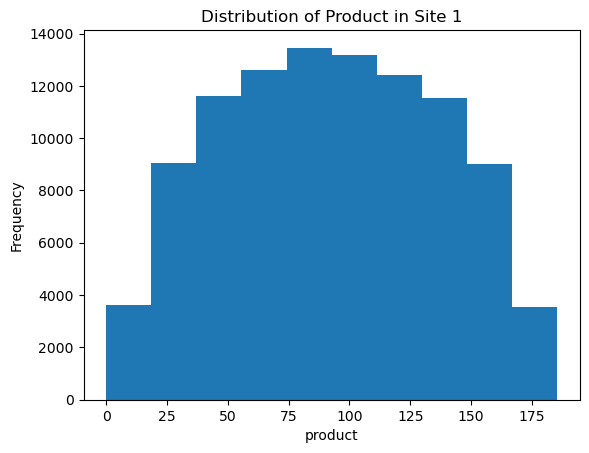

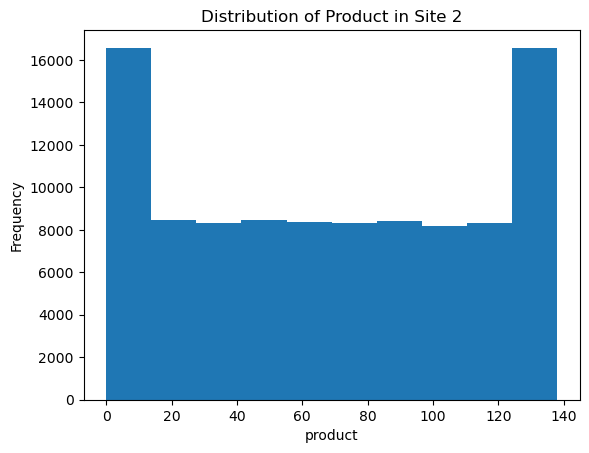

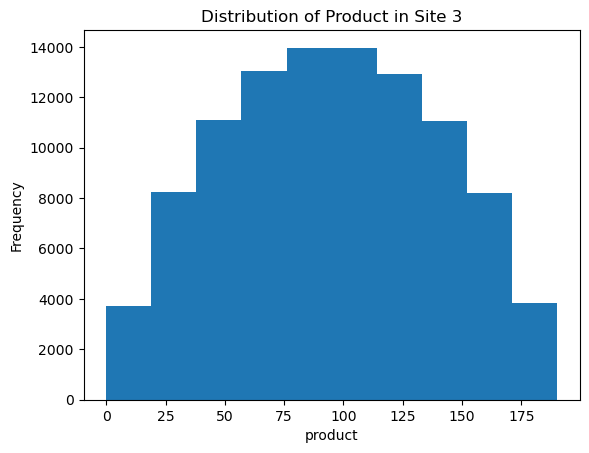

In [15]:
regions = [geo_data_0, geo_data_1, geo_data_2]

for count, site in enumerate(regions):
    # add axis labels to the plot
    site["product"].plot(kind="hist").set(
    title=f"Distribution of Product in Site {count + 1}",
    xlabel="product"
    )
    plt.show();

### Oberservation

There are 5 columns and 100,000 rows for all three regions dataset. There is no need to fill missing values. The data has been pre-processed. 

Site 0 and site 2 have normal distribution for production volume while site 1 has U shaped distribution of production volume.

We can start preparing our data. 

# Train and test the model for each region

### Create features and target for each region

In [16]:
# Creating features and target 

features_0 = geo_data_0.drop(['product','id'],axis=1)
target_0 = geo_data_0['product']

features_1 = geo_data_1.drop(['product','id'],axis=1)
target_1 = geo_data_1['product']

features_2 = geo_data_2.drop(['product','id'],axis=1)
target_2= geo_data_2['product']

### Split each region data into training and validation set

In [32]:
# Splitting data into training and validation with ratio of 0.25

features_train_0, features_val_0, target_train_0, target_val_0 = train_test_split(
    features_0, target_0,
    test_size=0.25,random_state=12345
)

# Using doc string to shorten string text
str1 = f"""
geo_data_0: The training data consists of {features_train_0.shape[0]:,} \
rows and validation data consists of {features_val_0.shape[0]:,} rows
"""
print(str1, end="")

features_train_1, features_val_1, target_train_1, target_val_1 = train_test_split(
    features_1, target_1,
    test_size=0.25,random_state=12345
)
str2 =  f"""
geo_data_1: The training data consists of {features_train_1.shape[0]:,} \
rows and validation data consists of {features_val_1.shape[0]:,} rows
"""  
print(str2, end="")

features_train_2, features_val_2, target_train_2, target_val_2 = train_test_split(
    features_2, target_2,
    test_size=0.25,random_state=12345
)

str3 = f"""
geo_data_2: The training data consists of {features_train_2.shape[0]:,}\
rows and validation data consists of {features_val_2.shape[0]:,} rows
"""
print(str3)


geo_data_0: The training data consists of 75,000 rows and validation data consists of 25,000 rows

geo_data_1: The training data consists of 75,000 rows and validation data consists of 25,000 rows

geo_data_2: The training data consists of 75,000rows and validation data consists of 25,000 rows



We have sucessfully split training data and validation data across all three datasets. 

The training data consists of 75,000 rows which is 75% of the data as required from project instructions.

### Create a function to get different scores

In [18]:
# Creating a function to calculate mse, rmse, mae, r2

def lr_geo_data(feature_train, target_train, features_val, target_val):
    model = LinearRegression()
    model.fit(feature_train, target_train)
    prediction_val = model.predict(features_val)
    mse = round(mean_squared_error(target_val, prediction_val),2)
    rmse = round(mse**0.5,2)
    mae = round(mean_absolute_error(target_val, prediction_val),2)
    r2 = round(r2_score(target_val, prediction_val),2)
    return mse, rmse, mae, r2
    

In [19]:
# Getting scores for geo_data_0

mse_data_0, rmse_data_0, mae_data_0, r2_data_0 = lr_geo_data(features_train_0, target_train_0,features_val_0,target_val_0)

# Getting scores for geo_data_1

mse_data_1, rmse_data_1, mae_data_1, r2_data_1 = lr_geo_data(features_train_1, target_train_1,features_val_1,target_val_1)

# Getting scores for geo_data_2

mse_data_2, rmse_data_2, mae_data_2, r2_data_2 = lr_geo_data(features_train_2, target_train_2,features_val_2,target_val_2)




In [20]:
# Create table to display the scores 

score_for_regions = pd.DataFrame(columns=['mse','rmse','mae','r2'])

geo_data_0_scores = [mse_data_0, rmse_data_0, mae_data_0, r2_data_0]

geo_data_1_scores = [ mse_data_1, rmse_data_1, mae_data_1, r2_data_1]

geo_data_2_scores = [ mse_data_2, rmse_data_2, mae_data_2, r2_data_2]

score_for_regions.loc['geo_data_0']= geo_data_0_scores

score_for_regions.loc['geo_data_1']= geo_data_1_scores

score_for_regions.loc['geo_data_2']= geo_data_2_scores


score_for_regions

,mse,rmse,mae,r2
geo_data_0,1412.21,37.58,30.92,0.28
geo_data_1,0.80,0.89,0.72,1.00
geo_data_2,1602.38,40.03,32.79,0.21


### Observation

The error for `geo_data_1` is smallest meaning the model is best at predicting volumne of reserves in the oil well. However, it seems to be predicting too well. Also note that the target distribution for `geo_data_1` is not normal distribution same as `geo_data_0` and `geo_data_2`.

# Calculating profit 

Conditions:

- When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.

- The budget for development of 200 oil wells is 100 USD million.

- One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).

- After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.


In [21]:
# Store key values for calculations in variables

development_budget = 100000000 
product_price = 4500
sample_size = 500
best_200 = 200
risk = 0.025


Based on the instructions, we will have to pick the best 200 predictions for profit calculations. Since we have split data into features and target earlier, we will merge them back and add prediction values, sort by predicted value in descending value, and take the first 200 rows to calculate profit with actual production. 

### Prepare complete dataset for region 0 for profit calculation

In [22]:
# Creating new dataset from validation set and combining features back with the target

profit_geo_0 = features_val_0.copy()

profit_geo_0['vol_of_reserves'] = target_val_0

# Create model 
model = LinearRegression()
model.fit(features_train_0, target_train_0)
    
# Create a new column of prediction
profit_geo_0['predict_vol_of_reserves'] = model.predict(features_val_0)

profit_geo_0

,f0,f1,f2,vol_of_reserves,predict_vol_of_reserves
71751,0.948970,-0.057547,2.095727,10.038645,95.894952
80493,0.992974,0.206671,-0.142278,114.551489,77.572583
2655,1.199854,-0.563356,-1.852991,132.603635,77.892640
53233,0.691422,-0.433347,0.564974,169.072125,90.175134
91141,0.420772,0.972638,0.736190,122.325180,70.510088
...,...,...,...,...,...
12581,1.841106,-0.107678,2.585648,170.116726,103.037104
18456,0.041859,0.489280,2.168001,93.632175,85.403255
73035,0.376389,1.054298,-0.430104,127.352259,61.509833
63834,1.071330,-0.470046,4.527099,99.782700,118.180397


### Prepare complete dataset for region 1 for profit calculation

In [23]:
# Creating new dataset from validation set and combining features back with the target

profit_geo_1 = features_val_1.copy()

profit_geo_1['vol_of_reserves'] = target_val_1

# Create model 
model = LinearRegression()
model.fit(features_train_1, target_train_1)
    
# Create a new column of prediction
profit_geo_1['predict_vol_of_reserves'] = model.predict(features_val_1)

profit_geo_1

,f0,f1,f2,vol_of_reserves,predict_vol_of_reserves
71751,-0.371866,-1.862494,3.002210,80.859783,82.663314
80493,9.015122,-13.881455,1.995363,53.906522,54.431786
2655,-6.507568,-4.817448,1.003449,30.132364,29.748760
53233,14.560845,-10.667755,1.995175,53.906522,53.552133
91141,6.090476,-4.494723,0.013815,0.000000,1.243856
...,...,...,...,...,...
12581,-4.107455,-4.607004,4.991140,137.945408,136.869211
18456,-8.363585,-6.357527,3.995592,110.992147,110.693465
73035,-9.136241,-5.403258,5.000925,137.945408,137.879341
63834,-6.386442,-0.764568,3.011526,84.038886,83.761966


### Prepare complete dataset for region 2 for profit calculation

In [24]:
# Creating new dataset from validation set and combining features back with the target

profit_geo_2 = features_val_2.copy()

profit_geo_2['vol_of_reserves'] = target_val_2

# Create model 
model = LinearRegression()
model.fit(features_train_2, target_train_2)
    
# Create a new column of prediction
profit_geo_2['predict_vol_of_reserves'] = model.predict(features_val_2)

profit_geo_2

,f0,f1,f2,vol_of_reserves,predict_vol_of_reserves
71751,-1.444717,-3.861599,2.225805,61.212375,93.599633
80493,-1.418617,1.276544,-0.976433,41.850118,75.105159
2655,-4.587649,-0.413199,1.649268,57.776581,90.066809
53233,1.871584,1.619101,4.273555,100.053761,105.162375
91141,-2.028785,4.128167,6.089547,109.897122,115.303310
...,...,...,...,...,...
12581,-1.315037,-0.122572,-0.345986,28.492402,78.765887
18456,0.015144,0.876998,2.603666,21.431303,95.603394
73035,0.725767,-0.151545,3.258620,125.487229,99.407281
63834,-0.232209,-0.180354,-0.524997,99.422903,77.779912


After combining predicted values with features and target for validation set, we will create a function to calculate the profit. 

Per instructions, the profit is total of actual production value multiple by production cost of `4500` and minus development budget of 100 million. 

In [25]:
# create function to calculate profit

def profit_cal(profit_geo):
    best_200_predict = profit_geo.sort_values(by = 'predict_vol_of_reserves', ascending=False).head(200)
    total_product = best_200_predict['vol_of_reserves'].sum()
    revenue = total_product * product_price
    return revenue - development_budget
     
    

In [26]:
print(f'The profit for geo_data_0 is {profit_cal(profit_geo_0)}.')

print(f'The profit for geo_data_1 is {profit_cal(profit_geo_1)}.')

print(f'The profit for geo_data_2 is {profit_cal(profit_geo_2)}.')

The profit for geo_data_0 is 33208260.43139851.
The profit for geo_data_1 is 24150866.966815114.
The profit for geo_data_2 is 27103499.635998324.


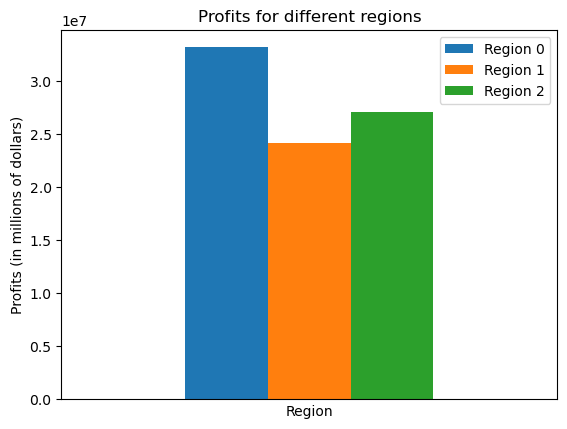

In [27]:
# Create a table to store profit data 

profit_regions = pd.DataFrame(columns=['Region 0', 'Region 1','Region 2'])

# Getting profit for different regions and assigning to a table
profits = [round(profit_cal(profit_geo_0),2),round(profit_cal(profit_geo_1),2),round(profit_cal(profit_geo_2),2)]

profit_regions.loc['profits'] = profits

# Creating a chart
profit_regions.plot(kind='bar')
                    
# Create a title and labels for the chart
plt.title('Profits for different regions'),
plt.xlabel('Region'),
plt.ylabel('Profits (in millions of dollars)')

# Remove the "profits" label from the x-axis
plt.xticks([])


plt.show()

#plt.xticks(ticks=[0,1], labels=[‘want to stay’, ‘want to leave’])

### Oberservation

After calculating the actual profit for each well using the top 200 predicted production volume, we can see that `region 0` has the highest profit while `region 1` has the lowest profit. 

However, we should also consider the risk of loss of each region and 95% confidence level before concluding which region is best for well development

# Confidence interval for different regions

### Region 0

In [28]:
# Create random state
state = np.random.RandomState(12345)

# Create empty list to store subsample
values_0 = []

# 1000 samples 

for i in range(1000):
    subsample = profit_geo_0.sample(n=500, replace=True, random_state=state )
    values_0.append(profit_cal(subsample))

# Converting to series as quantile() only works on series
values_0 = pd.Series(values_0)

# Get the 95% confidence level
lower_0 = values_0.quantile(0.025)
upper_0 = values_0.quantile(0.975)

print(f'The 95% confidence level for region 0 is between {lower_0:.2f} and {upper_0:.2f}.' )
print(f'The average profit for region 0 is {values_0.mean()}')
print(f'Risk of loss: {(values_0 < 0).mean():.2%}')

The 95% confidence level for region 0 is between -1112155.46 and 9097669.42.
The average profit for region 0 is 3961649.8480237117
Risk of loss: 6.90%


### Region 1

In [29]:
# Create random state
state = np.random.RandomState(12345)

# Create empty list to store subsample
values_1 = []

# 1000 samples 

for i in range(1000):
    subsample = profit_geo_1.sample(n=500, replace=True, random_state=state )
    values_1.append(profit_cal(subsample))

# Converting to series as quantile() only works on series
values_1 = pd.Series(values_1)

# Get the 95% confidence level
lower_1 = values_1.quantile(0.025)
upper_1 = values_1.quantile(0.975)

print(f'The 95% confidence level for region 1 is between {lower_1:.2f} and {upper_1:.2f}.' )
print(f'The average profit for region 1 is {values_1.mean()}')
print(f'Risk of loss: {(values_1 < 0).mean():.2%}')


The 95% confidence level for region 1 is between 338205.09 and 8522894.54.
The average profit for region 1 is 4560451.057866608
Risk of loss: 1.50%


### Region 2

In [30]:
# Create random state
state = np.random.RandomState(12345)

# Create empty list to store subsample
values_2 = []

# 1000 samples 

for i in range(1000):
    subsample = profit_geo_2.sample(n=500, replace=True, random_state=state )
    values_2.append(profit_cal(subsample))

# Converting to series as quantile() only works on series
values_2 = pd.Series(values_2)

# Get the 95% confidence level
lower_2 = values_2.quantile(0.025)
upper_2 = values_2.quantile(0.975)

print(f'The 95% confidence level for region 2 is between {lower_2:.2f} and {upper_2:.2f}.' )
print(f'The average profit for region 2 is {values_2.mean()}')
print(f'Risk of loss: {(values_2 < 0).mean():.2%}')

The 95% confidence level for region 2 is between -1633504.13 and 9503595.75.
The average profit for region 2 is 4044038.665683568
Risk of loss: 7.60%


# Conclusion

The goal of the project is to find best region to develop new well. 

We started with examining the size of individual region data. We also looked at the distribution of the `product` column for each region. `Region 0` and `Region 2` have normal distribution of production volume while `Region 1` has an U shape distribution. 

Afterwards, we create different variables to store features and target for each region. We then split the data into training and validation set. 

We trained our model with training data and use validation set to check the RMSE (root mean squared error). We can see that `region 1` has the lowest error meaning it is predciting validation set very well.

Next phrase is to check what is the profit for individual region. We sort by the predicted value and took top 200 samples's actualy production volume to calculate the profit. `Region 0` has highest profit and `region 1` has lowest profit amongst the three. 

We need to take the risk of loss into account as well. Not every well is making profit. Therefore, we look at 95% confidence level and noticed that `region 0` and `region 2` lowest range can be - $100,000 . While `region 1`'s lowest range still falls into positive.

After averaging out the positive profits for each region, `Region 1` or data from `geo_data_1` has the highest average profit and lowest risk of loss. Therefore, the best region for new well development is region 1. 